In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

train_set = torchvision.datasets.CIFAR10(
    root="./data",
    train = True, 
    download = True,
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
)
train_loader = torch.utils.data.DataLoader(train_set,batch_size=64,shuffle=True)


Extracting ./data/cifar-10-python.tar.gz to ./data


In [2]:
test_set = torchvision.datasets.CIFAR10(
    root="./data",
    train = False, 
    download = True,
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
)
test_loader = torch.utils.data.DataLoader(test_set,batch_size=10,shuffle=False)

Files already downloaded and verified


In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

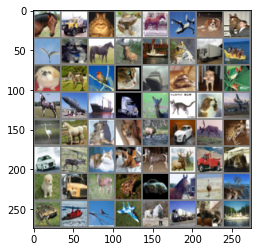

horse truck  frog  frog horse


In [4]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(5)))

In [5]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.cov1 = nn.Conv2d(3,6,5)
    self.cov2 = nn.Conv2d(6,16,5)

    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,120)
    self.fc3 = nn.Linear(120,84)
    self.fc4 = nn.Linear(84,10)
    self.dropout = nn.Dropout2d(0.25)

  def forward(self,x):
    x = F.max_pool2d(F.relu(self.cov1(x)), kernel_size=2, stride=2)
    x = F.max_pool2d(F.relu(self.cov2(x)), kernel_size=2, stride=2)
    x = x.view(-1,16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [6]:
net = Net()

In [7]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(),lr=0.001)
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()


for epoch in range(50):
  total = 0
  total_correct = 0
  for data in train_loader:
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs,labels) # calculate loss
    loss.backward() # Calculate gradients
    optimizer.step() # Update weights

    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    total_correct += (predicted == labels).sum().item()
  
  print("Epoch ",epoch+1," Accuracy : ",total_correct*100/total )

print("Training Over")

Epoch  1  Accuracy :  37.336
Epoch  2  Accuracy :  49.466
Epoch  3  Accuracy :  54.744
Epoch  4  Accuracy :  58.654
Epoch  5  Accuracy :  61.48
Epoch  6  Accuracy :  63.71
Epoch  7  Accuracy :  65.564
Epoch  8  Accuracy :  67.172
Epoch  9  Accuracy :  68.664
Epoch  10  Accuracy :  69.67
Epoch  11  Accuracy :  70.92
Epoch  12  Accuracy :  72.09
Epoch  13  Accuracy :  72.98
Epoch  14  Accuracy :  74.1
Epoch  15  Accuracy :  74.772
Epoch  16  Accuracy :  75.698
Epoch  17  Accuracy :  76.14
Epoch  18  Accuracy :  77.372
Epoch  19  Accuracy :  78.114
Epoch  20  Accuracy :  78.82
Epoch  21  Accuracy :  79.478
Epoch  22  Accuracy :  79.902
Epoch  23  Accuracy :  80.452
Epoch  24  Accuracy :  81.262
Epoch  25  Accuracy :  81.718
Epoch  26  Accuracy :  82.312
Epoch  27  Accuracy :  82.722
Epoch  28  Accuracy :  83.376
Epoch  29  Accuracy :  83.898
Epoch  30  Accuracy :  84.5
Epoch  31  Accuracy :  84.66
Epoch  32  Accuracy :  85.114
Epoch  33  Accuracy :  85.864
Epoch  34  Accuracy :  86.296
Ep

In [8]:
correct = 0
total = 0
with torch.no_grad():
  for data in test_loader:
    inputs, labels = data
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()


print("Accuracy ",100*correct/total)

Accuracy  61.21


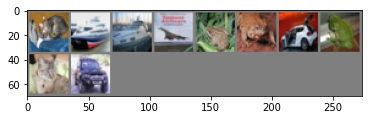

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:  horse plane   cat   cat  deer  ship   dog   dog   dog horse


In [9]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))
outputs = net(inputs)
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))

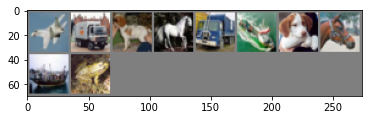

GroundTruth:  plane truck   dog horse truck  ship   dog horse  ship  frog
Predicted:  horse plane   cat   cat  deer  ship   dog   dog   dog horse


In [10]:
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))
outputs = net(inputs)
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(10)))